In [1]:
import rioxarray
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def print_raster(raster):
    s = raster.rio.shape
    n = s[0]*s[1]
    nnan = np.sum(np.isnan(raster.values))
    mean = np.nanmean(raster.values)
    median = np.nanmedian(raster.values)
    rmin = np.nanmin(raster.values)
    rmax = np.nanmax(raster.values)
    rmsd = np.sqrt(np.nanmean((raster.values)**2))
    print(
        f"shape: {raster.rio.shape}\n"
        f"resolution: {raster.rio.resolution()}\n"
        f"bounds: {raster.rio.bounds()}\n"
        f"n: {n}\n"
        f"nnan: {nnan}\n"
        f"mean: {mean:.3f}\n"
        f"median:  {median:.3f}\n"
        f"min:  {rmin:.3f}\n"
        f"max:  {rmax:.3f}\n"
        f"RMSD: {rmsd:.3f}\n"
        f"CRS: {raster.rio.crs}\n"
    )
    return n, nnan, mean, median, rmin, rmax, rmsd

In [3]:
ddir = "F:/TownNeckBeach_Testing/"
infile1 = ddir+"TNB_CLASSIFY_{}_test.tif".format(1)
infile2 = ddir+"TNB_CLASSIFY_{}_test.tif".format(3)
outfile = ddir+"TNB_1_minus_3.tif"
outtitle = 'TNB_1_minus_3'

r1 = rioxarray.open_rasterio(
    infile1,
    masked=True
)
r2 = rioxarray.open_rasterio(
    infile2,
    masked=True
)
print('r1')
print_raster(r1)
print('r2')
print_raster(r2)

r1
shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13433158
mean: 1.511
median:  1.334
min:  -37.272
max:  7.940
RMSD: 2.228
CRS: None

r2
shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13434987
mean: 1.512
median:  1.343
min:  -37.531
max:  8.041
RMSD: 2.214
CRS: None



(17875200, 13434987, 1.5123512, 1.343, -37.531, 8.041, 2.2136798)

In [4]:
r1_minus_r2 = r1-r2
stats = print_raster(r1_minus_r2)
stext = \
        f"n: {stats[0]}\n"+\
        f"nnan: {stats[1]}\n"+\
        f"mean: {stats[2]:.3f}\n"+\
        f"median:  {stats[3]:.3f}\n"+\
        f"min:  {stats[4]:.3f}\n"+\
        f"max:  {stats[5]:.3f}\n"+\
        f"RMSD: {stats[6]:.3f}\n"
print(stext)

shape: (3920, 4560)
resolution: (0.25, -0.25)
bounds: (376330.0, 4624355.0, 377470.0, 4625335.0)
n: 17875200
nnan: 13480124
mean: -0.005
median:  0.003
min:  -13.006
max:  13.396
RMSD: 0.128
CRS: None

n: 17875200
nnan: 13480124
mean: -0.005
median:  0.003
min:  -13.006
max:  13.396
RMSD: 0.128



In [5]:
r1_minus_r2.rio.to_raster(outfile, driver="GTiff", compress="LZW")

In [6]:
x = r1_minus_r2.x.values
y = r1_minus_r2.y.values
z = np.squeeze(r1_minus_r2.values)
np.shape(z)

(3920, 4560)

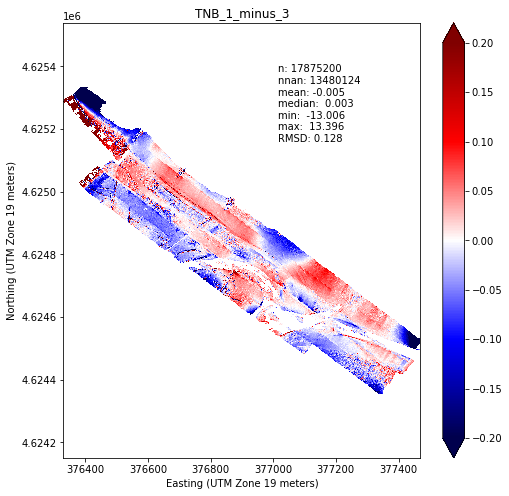

In [7]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
m = ax.pcolormesh(x, y, z, vmin=-.2, vmax=.2, cmap='seismic')
ax.set_xlabel('Easting (UTM Zone 19 meters)')
ax.set_ylabel('Northing (UTM Zone 19 meters)')
plt.axis('equal')
plt.colorbar(m, extend='both')
plt.text(.6, .7, stext, transform=ax.transAxes)
plt.title(outtitle)
plt.savefig(ddir+outtitle+'.jpg', dpi=200, bbox_inches='tight')